## OpenCVを使って画像認識＋ぼかしをかける

OpenCV（正式名称： Open Source Computer Vision Library）は、オープンソースのコンピューター・ビジョン・ライブラリです。コンピューターで画像や動画を処理するのに必要な、さまざま機能が実装されており、BSDライセンスで配布されていることから学術用途だけでなく商用目的でも利用できます。加えて、マルチプラットフォーム対応されているため、幅広い場面で利用されていることが特徴です。

　OpenCVは、Intelで開発され、その後、ロボティクス関連のハードウェア／ソフトウェアの開発を行っているWillow Garageに開発が引き継がれた後、現在はコンピュータービジョンの技術開発を手掛けるItseezによって開発が進められています。

　OpenCVを使うと、主に以下のような機能を利用できます。

フィルター処理
行列演算
オブジェクト追跡（Object Tracking）
領域分割（Segmentation）
カメラキャリブレーション（Calibration）
特徴点抽出
物体認識（Object recognition）
機械学習（Machine learning）
パノラマ合成（Stitching）
コンピュテーショナルフォトグラフィ（Computational Photography）
GUI（ウィンドウ表示、画像ファイル、動画ファイルの入出力、カメラキャプチャ）


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
from google.colab import files

In [7]:
uploaded_file = files.upload()

Saving 171508599_180328877243768_6030613612128337610_n.jpg to 171508599_180328877243768_6030613612128337610_n.jpg


In [8]:
uploaded_file_name = next(iter(uploaded_file))

In [9]:
import cv2 #OpenCV

In [10]:
orig = cv2.imread(uploaded_file_name)

In [11]:
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [12]:
from matplotlib import pyplot as plt

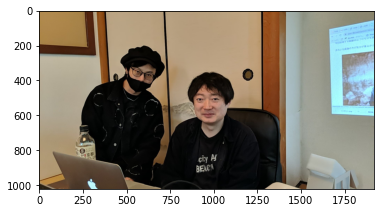

In [13]:
plt.imshow(src)

画像認識用ファイルはこちらからん入手　
haarcascade_frontalface_alt.xml
[https://github.com/opencv/opencv/tree/master/data/haarcascades](https://github.com/opencv/opencv/tree/master/data/haarcascades)



#cascadeファイル確認

In [14]:
cascade_file=  open('/content/drive/My Drive/haarcascade_frontalface_alt.xml', encoding='utf-8')

In [15]:
print(cascade_file)

<_io.TextIOWrapper name='/content/drive/My Drive/haarcascade_frontalface_alt.xml' mode='r' encoding='utf-8'>


In [19]:
clas = cv2.CascadeClassifier('/content/drive/My Drive/haarcascade_frontalface_alt.xml') 

一度Grayにして顔認識しやすくする

In [20]:
img_gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

In [21]:
face_list = clas.detectMultiScale(img_gray, minSize=(150,150))

In [22]:
print(face_list)

[[862 432 207 207]]


ぼかし処理

In [23]:
x=face_list[0][0]
y=face_list[0][1]
w=face_list[0][2]
h=face_list[0][3]
red=(0,0,255)

In [24]:
img2 = cv2.rectangle(orig, (x,y), (x+w, y+h), red, thickness=20)

In [25]:
print(img2)

[[[ 81 138 177]
  [ 81 138 177]
  [ 81 138 177]
  ...
  [113 130 139]
  [115 130 139]
  [115 130 139]]

 [[ 81 138 177]
  [ 81 138 177]
  [ 81 138 177]
  ...
  [113 130 139]
  [115 130 139]
  [115 130 139]]

 [[ 81 138 177]
  [ 81 138 177]
  [ 81 138 177]
  ...
  [113 130 139]
  [113 130 139]
  [113 130 139]]

 ...

 [[ 24  35  43]
  [ 23  34  42]
  [ 23  34  42]
  ...
  [147 162 165]
  [147 162 165]
  [147 162 165]]

 [[ 22  33  41]
  [ 22  33  41]
  [ 22  33  41]
  ...
  [147 162 165]
  [147 162 165]
  [147 162 165]]

 [[ 24  35  43]
  [ 24  35  43]
  [ 25  36  44]
  ...
  [147 162 165]
  [147 162 165]
  [147 162 165]]]


In [26]:
from matplotlib import pyplot as plt

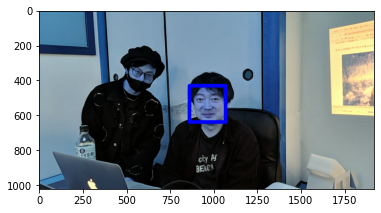

In [28]:
plt.imshow(img2)

In [30]:
face= img2[y:y+h, x:x+w]
reduc = cv2.resize(face, (8,8))
mosaic = cv2.resize(reduc,(w,h))
img2[y:y+h, x:x+w]=mosaic

In [31]:
from matplotlib import pyplot as plt

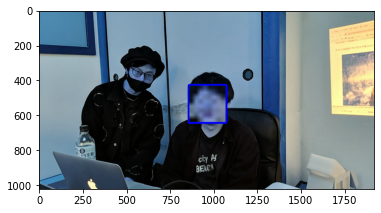

In [32]:
plt.imshow(img2)